In [38]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
import re
from keras.preprocessing import sequence
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import text_to_word_sequence
from sklearn.svm import LinearSVC

In [39]:
names=['URL','Category']
df=pd.read_csv('../input/URL Classification.csv',names=names, na_filter=False)
df1 = df[1:2001]
df2 = df[50000:52000]
df3 = df[520000:522000]
df4 =df[535300:537300]
df5 = df[650000:652000]
df6= df[710000:712000]
df7=  df[764200:766200]
df8=  df[793080:795080]
df9=  df[839730:841730]
df10=  df[850000:852000]
df11=  df[955250:957250]
df12=  df[1013000:1015000]
df13=  df[1143000:1145000]
df14=  df[1293000:1295000]
df15=  df[1492000:1494000]
dt=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15], axis=0)
df.drop(df.index[1:2000],inplace= True)
df.drop(df.index[50000:52000],inplace= True)
df.drop(df.index[520000:522000],inplace= True)
df.drop(df.index[535300:537300],inplace= True)
df.drop(df.index[650000:652000],inplace= True)
df.drop(df.index[710000:712000],inplace= True)
df.drop(df.index[764200:766200],inplace= True)
df.drop(df.index[793080:795080],inplace= True)
df.drop(df.index[839730:841730],inplace= True)
df.drop(df.index[850000:852000],inplace= True)
df.drop(df.index[955250:957250],inplace= True)
df.drop(df.index[1013000:1015000],inplace= True)
df.drop(df.index[1143000:1145000],inplace= True)
df.drop(df.index[1293000:1295000],inplace= True)
df.drop(df.index[1492000:1494000],inplace= True)
df.tail()

,URL,Category
1562974,http://www.maxpreps.com/,Sports
1562975,http://www.myscore.com/,Sports
1562976,http://sportsillustrated.cnn.com/highschool,Sports
1562977,http://rss.cnn.com/rss/si_highschool?format=xml,Sports
1562978,http://www.usatoday.com/sports/preps/,Sports


Text(0, 0.5, 'Total Number Of Individual Category for Testing')

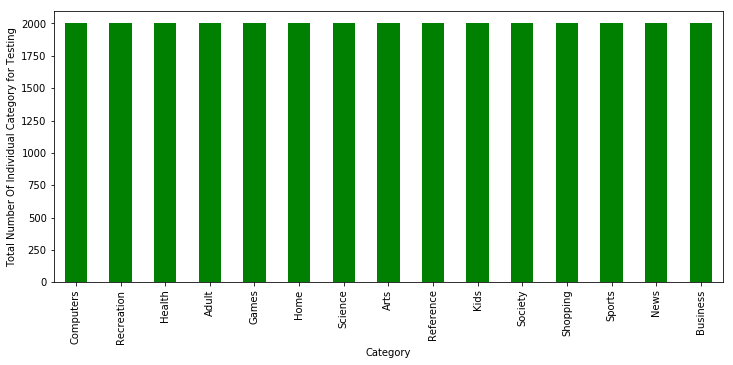

In [40]:
dt.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Testing')

Text(0, 0.5, 'Total Number Of Individual Category for Training')

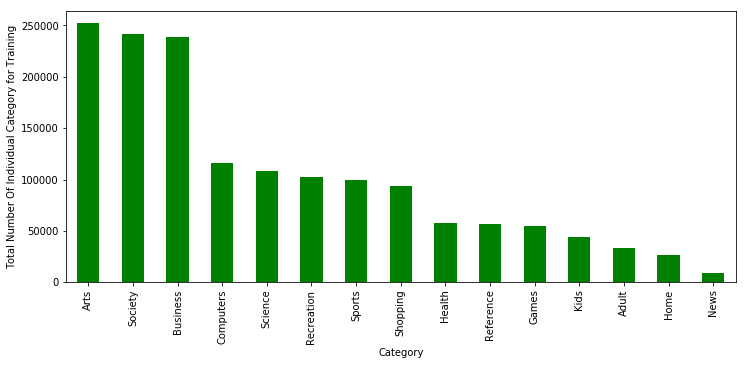

In [41]:
df.Category.value_counts().plot(figsize=(12,5),kind='bar',color='green');
plt.xlabel('Category')
plt.ylabel('Total Number Of Individual Category for Training')

In [42]:
X_train=df['URL']
y_train=df['Category']
print(X_train)
X_train.shape

1                           http://www.liquidgeneration.com/
2001              http://www.loony-archivist.com/ptcarchive/
2002       http://www.angelfire.com/bc/jojosworld/voyager...
2003           http://www.fortunecity.com/athena/satin/2089/
2004               http://www.geocities.com/angelina_vansen/
2005       http://www.chantico.com/alastor/fanfic/voyager...
2006       http://www.angelfire.com/trek/craters0/index.html
2007                 http://www.angelfire.com/trek/khylaren/
2008                     http://kimbo_stv_fanfic.tripod.com/
2009                     http://www.geocities.com/wonkots42/
2010                   http://members.door.net/jlf/other.htm
2011       http://www.ringsurf.com/netring?ring=pkslash;a...
2012       http://www.ringsurf.com/netring?ring=stvoy;act...
2013                        http://www.siubhan.com/list.html
2014       http://www.ringsurf.com/netring?ring=cpslash;a...
2015                 http://e.webring.com/hub?ring=treksmutu
2016          http://c.w

(1532979,)

In [43]:
X_test=dt['URL']
y_test=dt['Category']
print(X_test)
X_test.shape

2                                http://www.onlineanime.org/
3          http://www.ceres.dti.ne.jp/~nekoi/senno/senfir...
4                                 http://www.galeon.com/kmh/
5                                http://www.fanworkrecs.com/
6                                 http://www.animehouse.com/
7                 http://www2.117.ne.jp/~mb1996ax/enadc.html
8            http://archive.rhps.org/fritters/yui/index.html
9                             http://www.freecartoonsex.com/
10                                   http://www.cutepet.org/
11                            http://www.taremeparadise.com/
12         http://www.internetdump.com/users/pornographit...
13                                   http://darkkaminari.net
14                     http://www.iei.net/~bkos1/velneko.htm
15                http://www9.kinghost.com/fetish/hentaibee/
16                               http://www.jasonmeador.com/
17           http://www.geocities.com/kaseychan17/index.html
18         http://www.an

(30000,)

In [44]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_clf = text_clf.fit(X_train, y_train)

In [45]:
from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
gs_clf = gs_clf.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [46]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
y_pred=gs_clf.predict(X_test)
print(y_pred)
precision_recall_fscore_support(y_test, y_pred, average='weighted')

['Society' 'Science' 'Adult' ... 'Sports' 'Sports' 'Sports']


(0.8859315528951907, 0.8459333333333333, 0.834003526296982, None)

In [47]:
y_pred=gs_clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,digits=4))

              precision    recall  f1-score   support

       Adult     0.9802    0.1730    0.2941      2000
        Arts     0.4888    0.9055    0.6349      2000
    Business     0.7165    0.9960    0.8335      2000
   Computers     0.9097    0.9475    0.9282      2000
       Games     0.9636    0.9265    0.9447      2000
      Health     0.9870    0.9525    0.9695      2000
        Home     0.9774    0.8660    0.9183      2000
        Kids     0.9271    0.6355    0.7541      2000
        News     0.9982    0.5585    0.7163      2000
  Recreation     0.9175    0.9845    0.9498      2000
   Reference     0.7735    0.9050    0.8341      2000
     Science     0.8996    0.9495    0.9239      2000
    Shopping     0.9725    0.9715    0.9720      2000
     Society     0.8057    0.9955    0.8906      2000
      Sports     0.9715    0.9220    0.9461      2000

   micro avg     0.8459    0.8459    0.8459     30000
   macro avg     0.8859    0.8459    0.8340     30000
weighted avg     0.8859   

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


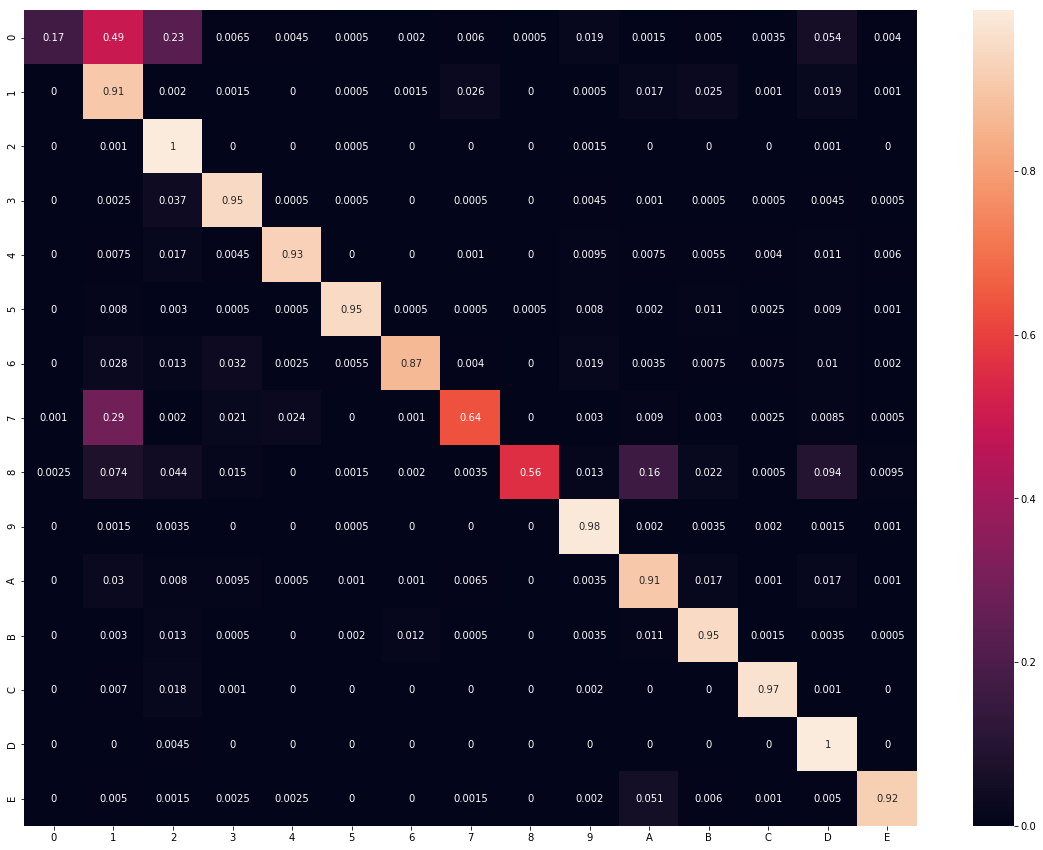

In [48]:

from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
gs_clf = gs_clf.fit(X_train, y_train)

from sklearn.model_selection import RandomizedSearchCV
n_iter_search = 5
parameters = {'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__alpha': (1e-2, 1e-3)}
gs_clf = RandomizedSearchCV(text_clf, parameters, n_iter = n_iter_search)
gs_clf = gs_clf.fit(X_train, y_train)
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
array = confusion_matrix(y_test, y_pred)
cm=np.array(array)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789ABCDE"],
                  columns = [i for i in "0123456789ABCDE"])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

In [49]:
print('Naive Bayes Train Accuracy = ',metrics.accuracy_score(y_train,gs_clf.predict(X_train)))
print('Naive Bayes Test Accuracy = ',metrics.accuracy_score(y_test,gs_clf.predict(X_test)))

Naive Bayes Train Accuracy =  0.9503783156846898
Naive Bayes Test Accuracy =  0.8459333333333333


In [54]:
print(gs_clf.predict(['http://www.businesstoday.net/']))
print(gs_clf.predict([' http://www.iei.net/~bkos1/velneko.htm']))

['Business']
['Sports']
